<a href="https://colab.research.google.com/github/azzazhr/PCVK_Ganjil_2025/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Azzahra Attaqina**

**NIM : 2341720224**

**Kelas : TI-3B**

**MODUL 6 PCVK (TUGAS PRAKTIKUM)**

**1. Import folder yang ada di Drive Anda**

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.**


In [3]:
import cv2 as cv                  # Mengimpor pustaka OpenCV (Open Source Computer Vision Library) untuk operasi pengolahan citra dan visi komputer.
from google.colab.patches import cv2_imshow  # Mengimpor fungsi khusus untuk menampilkan citra OpenCV di lingkungan Google Colaboratory.
from skimage import io            # Mengimpor modul input/output (io) dari pustaka Scikit-image (skimage) yang digunakan untuk membaca, menulis, dan memanipulasi citra.
import matplotlib.pyplot as plt   # Mengimpor modul plotting (pyplot) dari Matplotlib untuk membuat grafik, kurva, dan menampilkan citra dengan sumbu koordinat.
import numpy as np                # Mengimpor pustaka NumPy untuk operasi matematika pada array multidimensi (seperti citra) secara efisien.
import math                       # Mengimpor pustaka Math untuk fungsi matematika dasar (seperti akar kuadrat atau logaritma), meskipun NumPy sering lebih diutamakan untuk array.
import os                         # Mengimpor pustaka OS (Operating System) untuk berinteraksi dengan sistem operasi, seperti mengakses jalur file.
import glob                       # Mengimpor pustaka Glob untuk menemukan jalur file yang cocok dengan pola tertentu (misalnya, membaca semua file *.jpg dalam satu folder).


**3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)**

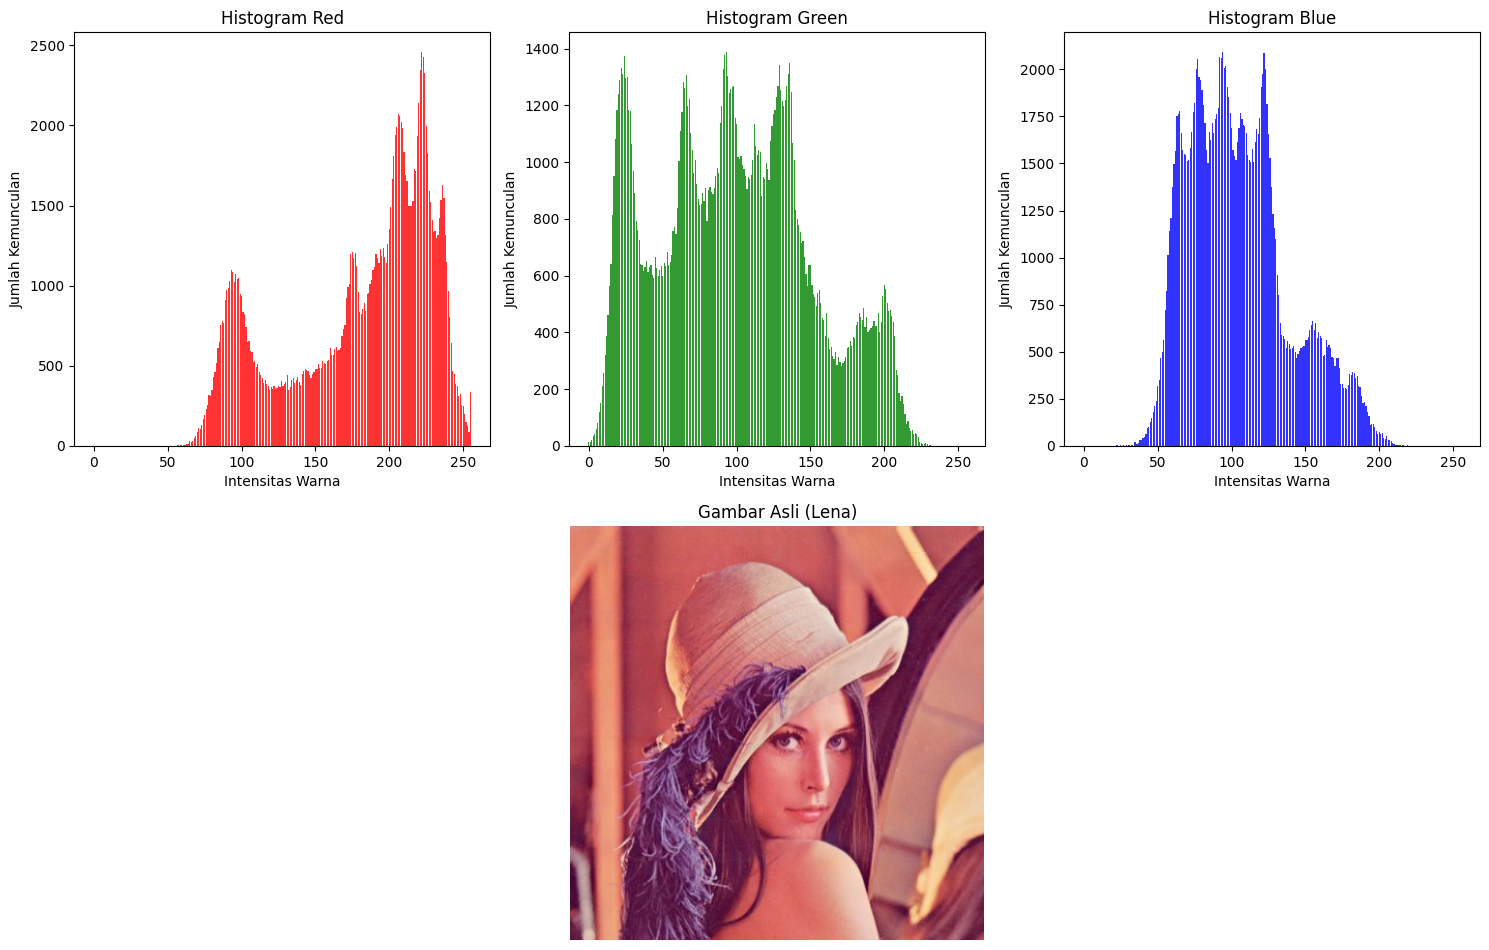

In [10]:
# Membaca gambar lena
base_path = '/content/drive/MyDrive/PCVK/Images/'
img_path = os.path.join(base_path, 'lena.jpg')

# Membaca gambar dari path yang ditentukan
img = cv.imread(img_path)

# Pengecekan untuk memastikan gambar berhasil dimuat
if img is None:
    print(f"ERROR: Gambar tidak ditemukan di path: {img_path}")
    print("Pastikan path dan nama file sudah benar.")
else:
    # Konversi warna dari BGR ke RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Membuat Figure dan Subplot
    fig, axs = plt.subplots(2, 3, figsize=(15,10))

    # Menghitung dan Menampilkan Histogram per Kanal
    # Plot Histogram Merah
    ax_red = axs[0,0]
    hist_r = cv.calcHist([img_rgb], [0], None, [256], [0, 256])

    ax_red.bar(range(256), hist_r.ravel(), color='red', alpha=0.8)
    ax_red.set_title('Histogram Red')
    ax_red.set_ylabel('Jumlah Kemunculan')
    ax_red.set_xlabel('Intensitas Warna')

    # Plot Histogram Hijau
    ax_green = axs[0,1]
    hist_g = cv.calcHist([img_rgb], [1], None, [256], [0, 256])

    ax_green.bar(range(256), hist_g.ravel(), color='green', alpha=0.8)
    ax_green.set_title('Histogram Green')
    ax_green.set_ylabel('Jumlah Kemunculan')
    ax_green.set_xlabel('Intensitas Warna')

    # Plot Histogram Biru
    ax_blue = axs[0,2]
    hist_b = cv.calcHist([img_rgb], [2], None, [256], [0, 256])

    ax_blue.bar(range(256), hist_b.ravel(), color='blue', alpha=0.8)
    ax_blue.set_title('Histogram Blue')
    ax_blue.set_ylabel('Jumlah Kemunculan')
    ax_blue.set_xlabel('Intensitas Warna')

    # Menampilkan Gambar Asli di Baris Bawah
    fig.delaxes(axs[1,0])
    fig.delaxes(axs[1,1])
    fig.delaxes(axs[1,2])

    ax_img = fig.add_subplot(2, 1, 2)
    ax_img.imshow(img_rgb)
    ax_img.set_title('Gambar Asli (Lena)')
    ax_img.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Gambar berhasil dimuat! Memproses histogram menggunakan NumPy...


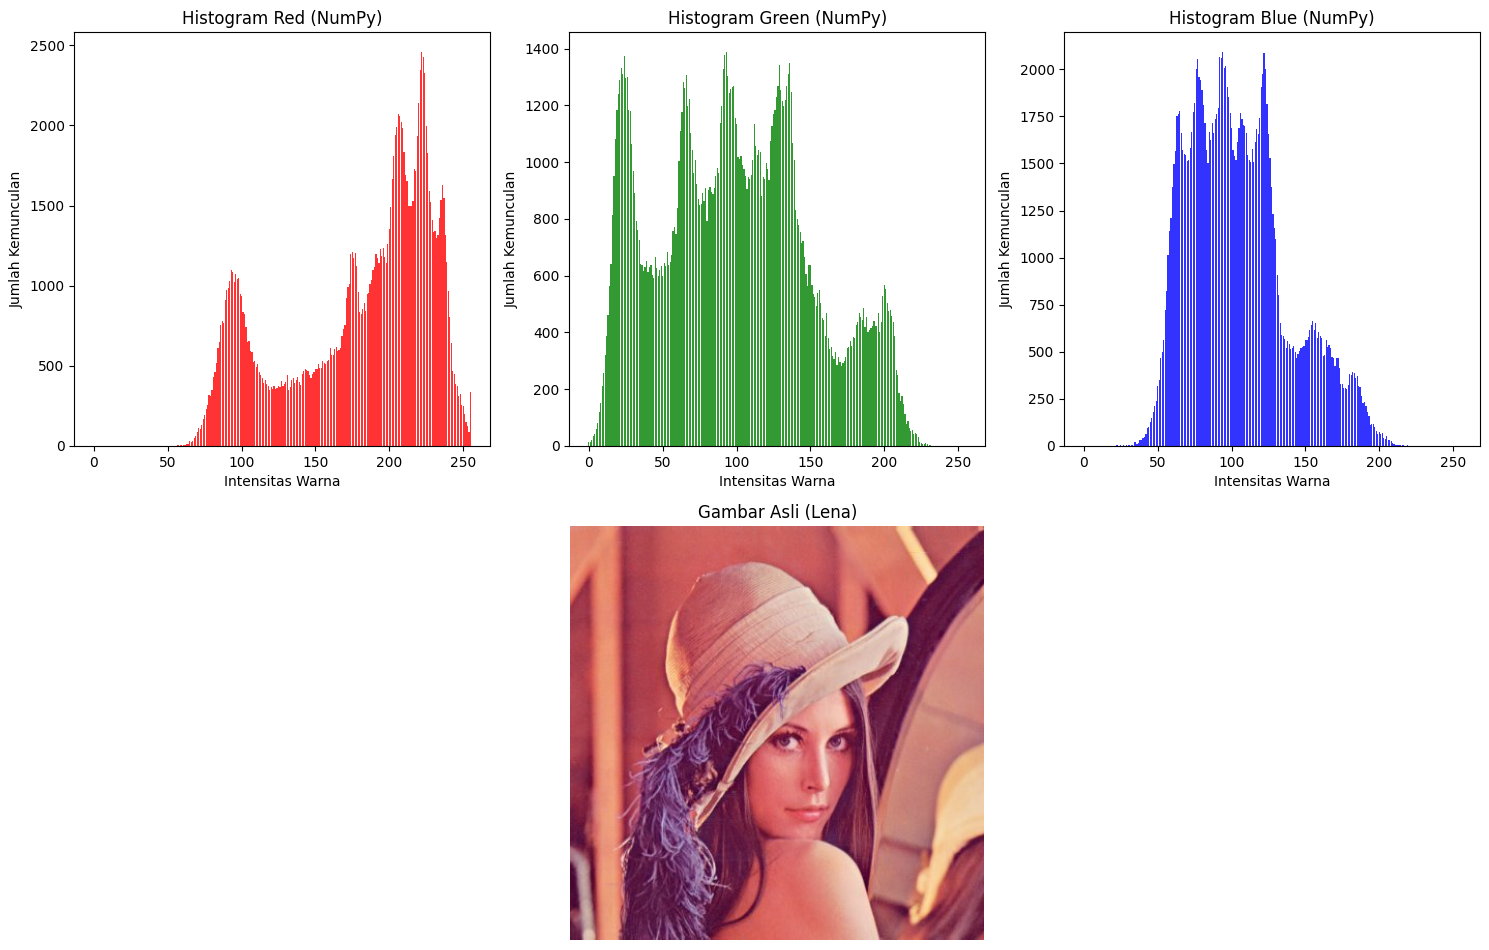

In [14]:
# Membaca dan memeriksa gambar lena
base_path = '/content/drive/MyDrive/PCVK/Images/'
img_path = os.path.join(base_path, 'lena.jpg')

img = cv.imread(img_path)

# Pengecekan keamanan untuk memastikan gambar berhasil dimuat
if img is None:
    print(f"ERROR: Gambar tidak ditemukan di path: {img_path}")
    print("Pastikan path dan nama file sudah benar.")
else:
    print("Gambar berhasil dimuat! Memproses histogram menggunakan NumPy...")
    # Konversi warna dari BGR ke RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Perhitungan Histogram Menggunakan NumPy
    # Memisahkan kanal R, G, B
    r_channel, g_channel, b_channel = cv.split(img_rgb)

    # Menghitung histogram untuk setiap kanal menggunakan np.histogram() yaitu oleh NumPy
    # Argumen kedua '_' digunakan untuk menampung 'bins' yang tidak kita perlukan untuk plotting
    hist_r, _ = np.histogram(r_channel.ravel(), bins=256, range=[0, 256])
    hist_g, _ = np.histogram(g_channel.ravel(), bins=256, range=[0, 256])
    hist_b, _ = np.histogram(b_channel.ravel(), bins=256, range=[0, 256])

    # Pengaturan dan Penampilan Plot
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    # Plot Histogram Merah
    axs[0, 0].bar(range(256), hist_r, color='red', alpha=0.8)
    axs[0, 0].set_title('Histogram Red (NumPy)')
    axs[0, 0].set_ylabel('Jumlah Kemunculan')
    axs[0, 0].set_xlabel('Intensitas Warna')

    # Plot Histogram Hijau
    axs[0, 1].bar(range(256), hist_g, color='green', alpha=0.8)
    axs[0, 1].set_title('Histogram Green (NumPy)')
    axs[0, 1].set_ylabel('Jumlah Kemunculan')
    axs[0, 1].set_xlabel('Intensitas Warna')

    # Plot Histogram Biru
    axs[0, 2].bar(range(256), hist_b, color='blue', alpha=0.8)
    axs[0, 2].set_title('Histogram Blue (NumPy)')
    axs[0, 2].set_ylabel('Jumlah Kemunculan')
    axs[0, 2].set_xlabel('Intensitas Warna')

    # Hapus subplot yang tidak terpakai di baris kedua
    fig.delaxes(axs[1, 0])
    fig.delaxes(axs[1, 1])
    fig.delaxes(axs[1, 2])

    # Menampilkan gambar asli lena
    ax_img = fig.add_subplot(2, 1, 2)
    ax_img.imshow(img_rgb)
    ax_img.set_title('Gambar Asli (Lena)')
    ax_img.axis('off')

    # Rapikan tata letak dan tampilkan plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

**PERBANDINGAN HASIL MANUAL (TUGAS NO 3) DAN NUMPY (TUGAS NO 4)**

Setelah membandingkan hasil perhitungan histogram untuk setiap kanal warna (Merah, Hijau, dan Biru), dapat dipastikan bahwa output yang dihasilkan dari metode manual (Tugas 3) dan metode menggunakan library NumPy (Tugas 4) adalah sama.

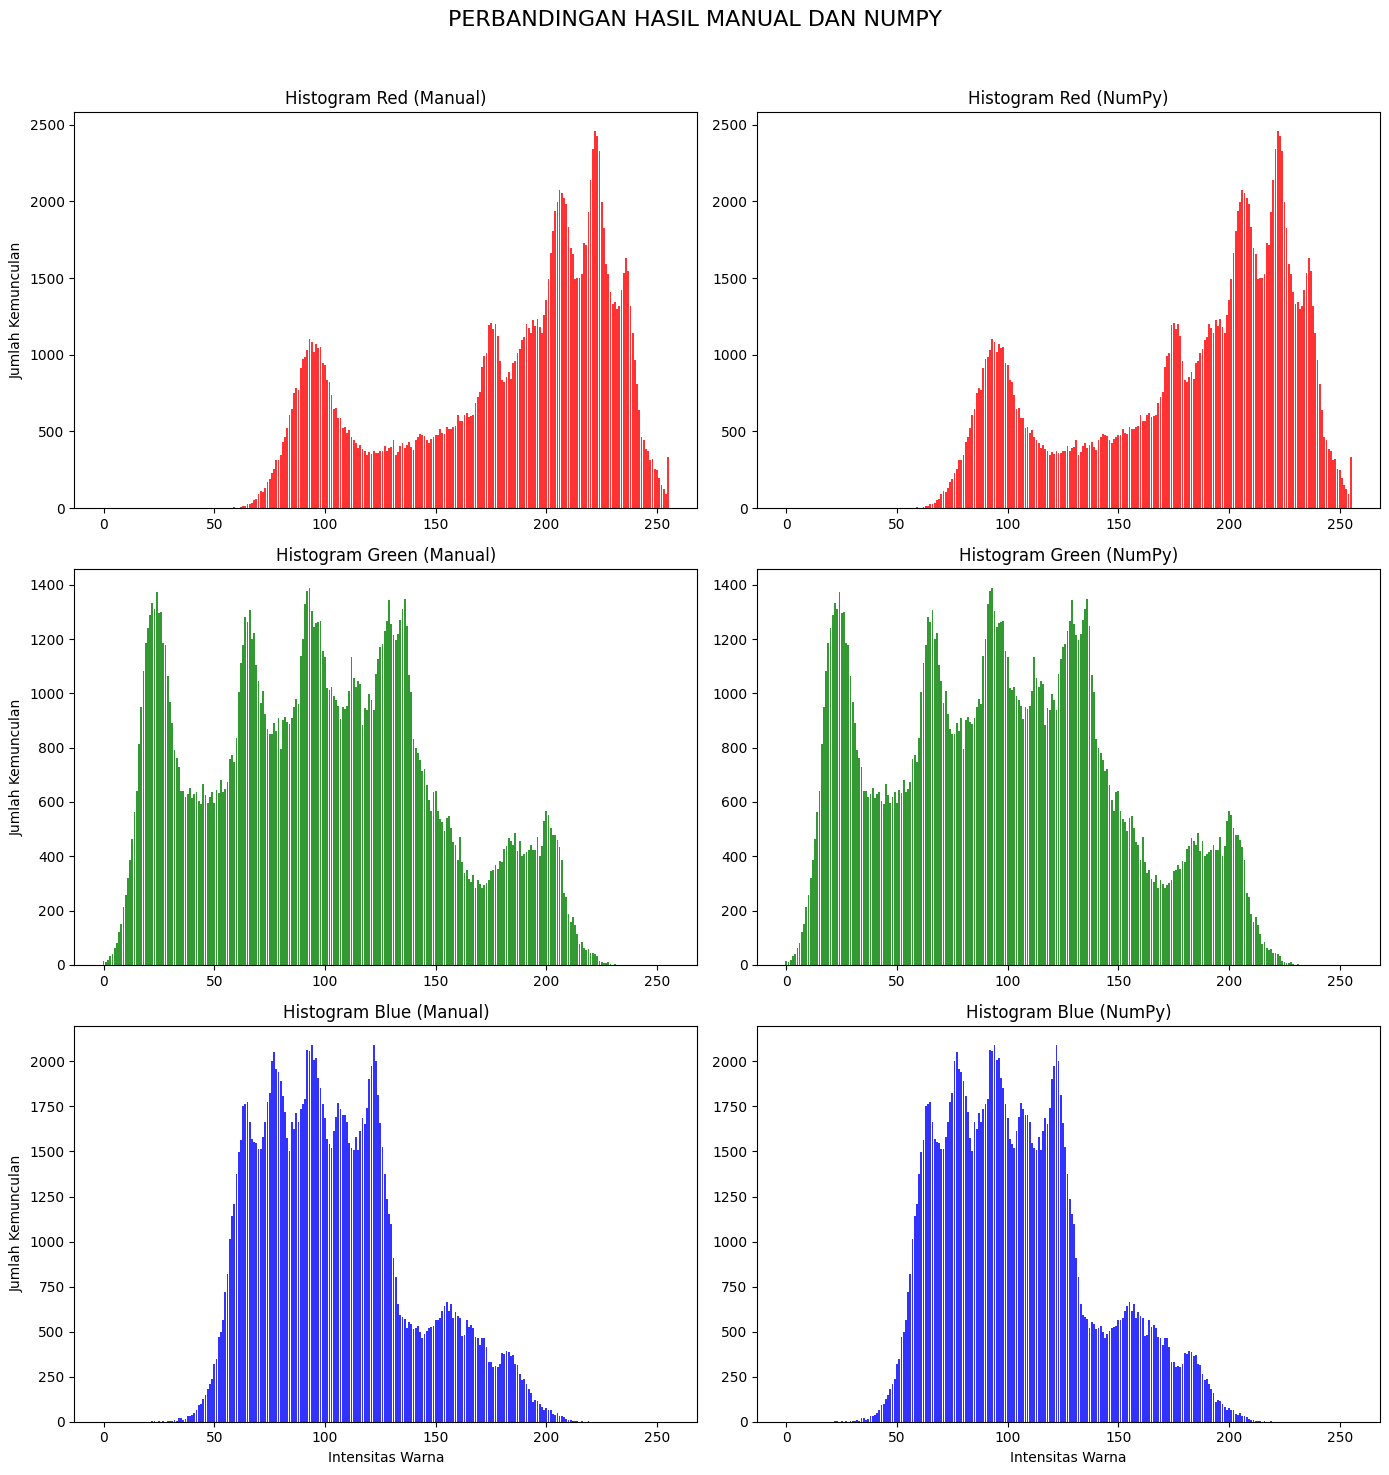

In [22]:
# Membaca gambar lena
base_path = '/content/drive/MyDrive/PCVK/Images/'
img_path = os.path.join(base_path, 'lena.jpg')

# Membaca gambar dari path
img = cv.imread(img_path)

if img is None:
    print(f"ERROR: Gambar tidak ditemukan di path: {img_path}")
else:
    # Konversi warna dari BGR ke RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # METODE 1: Perhitungan Manual (dari Tugas 3)
    h, w, c = img_rgb.shape
    hist_r_manual = np.zeros(256, dtype=int)
    hist_g_manual = np.zeros(256, dtype=int)
    hist_b_manual = np.zeros(256, dtype=int)
    for i in range(h):
        for j in range(w):
            hist_r_manual[img_rgb[i, j, 0]] += 1
            hist_g_manual[img_rgb[i, j, 1]] += 1
            hist_b_manual[img_rgb[i, j, 2]] += 1

    # METODE 2: Perhitungan Menggunakan NumPy (dari Tugas 4)
    r_channel, g_channel, b_channel = cv.split(img_rgb)
    hist_r_numpy, _ = np.histogram(r_channel.ravel(), bins=256, range=[0, 256])
    hist_g_numpy, _ = np.histogram(g_channel.ravel(), bins=256, range=[0, 256])
    hist_b_numpy, _ = np.histogram(b_channel.ravel(), bins=256, range=[0, 256])

    # Pengaturan Plotting Grid 3x2
    fig, axs = plt.subplots(3, 2, figsize=(14, 15))
    fig.suptitle("PERBANDINGAN HASIL MANUAL DAN NUMPY", fontsize=16)

    # Baris 1: Kanal Merah
    axs[0, 0].bar(range(256), hist_r_manual, color='red', alpha=0.8)
    axs[0, 0].set_title('Histogram Red (Manual)')
    axs[0, 0].set_ylabel('Jumlah Kemunculan')

    axs[0, 1].bar(range(256), hist_r_numpy, color='red', alpha=0.8)
    axs[0, 1].set_title('Histogram Red (NumPy)')

    # Baris 2: Kanal Hijau
    axs[1, 0].bar(range(256), hist_g_manual, color='green', alpha=0.8)
    axs[1, 0].set_title('Histogram Green (Manual)')
    axs[1, 0].set_ylabel('Jumlah Kemunculan')

    axs[1, 1].bar(range(256), hist_g_numpy, color='green', alpha=0.8)
    axs[1, 1].set_title('Histogram Green (NumPy)')

    # Baris 3: Kanal Biru
    axs[2, 0].bar(range(256), hist_b_manual, color='blue', alpha=0.8)
    axs[2, 0].set_title('Histogram Blue (Manual)')
    axs[2, 0].set_ylabel('Jumlah Kemunculan')
    axs[2, 0].set_xlabel('Intensitas Warna')

    axs[2, 1].bar(range(256), hist_b_numpy, color='blue', alpha=0.8)
    axs[2, 1].set_title('Histogram Blue (NumPy)')
    axs[2, 1].set_xlabel('Intensitas Warna')

    # Rapikan tata letak dan tampilkan
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()